Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/25 [00:00<?, ?it/s]

Saved: synthetic_image_dataset/img_1.png


  0%|          | 0/25 [00:00<?, ?it/s]

Saved: synthetic_image_dataset/img_2.png


  0%|          | 0/25 [00:00<?, ?it/s]

Saved: synthetic_image_dataset/img_3.png


  0%|          | 0/25 [00:00<?, ?it/s]

Saved: synthetic_image_dataset/img_4.png


  0%|          | 0/25 [00:00<?, ?it/s]

Saved: synthetic_image_dataset/img_5.png


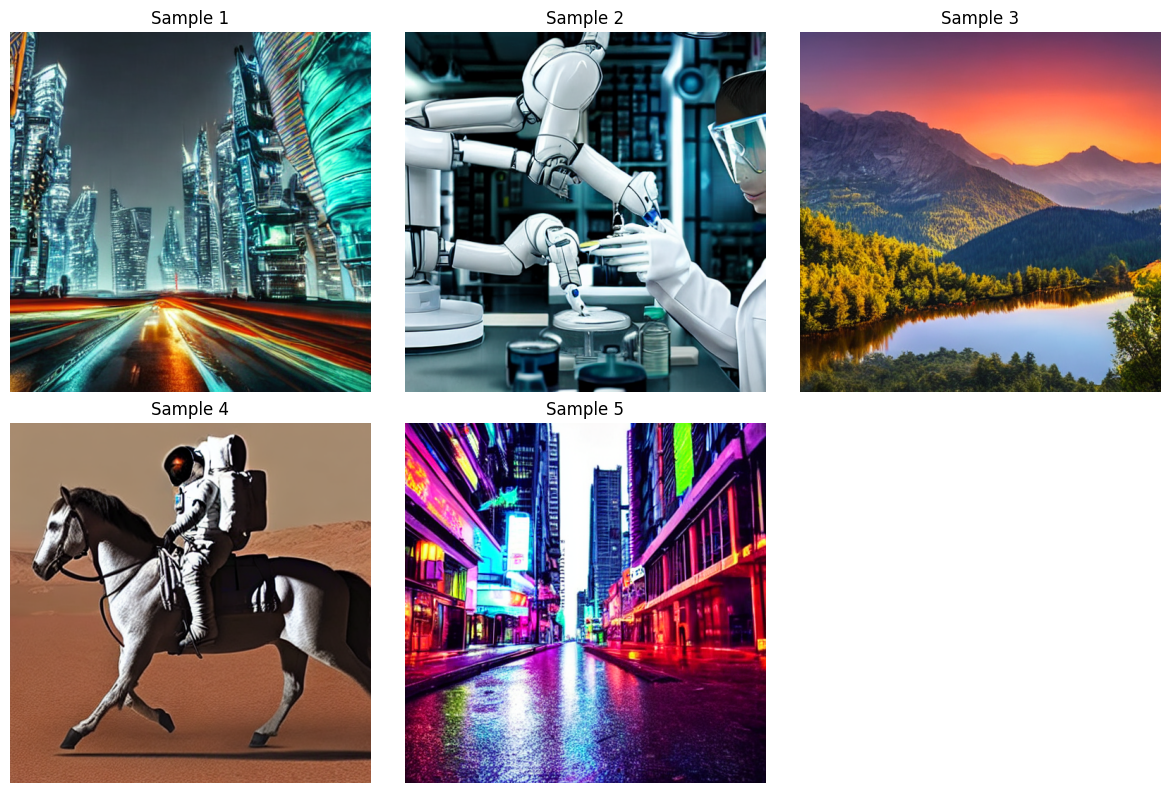

In [1]:
import os
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image
import matplotlib.pyplot as plt

# -----------------------------
# 1. Select Device
# -----------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"

# -----------------------------
# 2. Load Lightweight Diffusion Model
# -----------------------------
model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16 if device == "cuda" else torch.float32
)
pipe = pipe.to(device)

# Enable memory optimizations
pipe.enable_attention_slicing()

# -----------------------------
# 3. Input Prompts
# -----------------------------
prompts = [
    "A futuristic city with flying cars at night",
    "A robot scientist working in a laboratory",
    "A peaceful mountain landscape during sunrise",
    "An astronaut riding a horse on Mars",
    "A cyberpunk street with neon lights and rain"
]

# -----------------------------
# 4. Create Dataset Folder
# -----------------------------
dataset_dir = "synthetic_image_dataset"
os.makedirs(dataset_dir, exist_ok=True)

# -----------------------------
# 5. Generate and Save Images
# -----------------------------
generated_images = []

for idx, prompt in enumerate(prompts):
    image = pipe(prompt, num_inference_steps=25).images[0]

    image_path = os.path.join(dataset_dir, f"img_{idx+1}.png")
    image.save(image_path)

    generated_images.append(image)
    print(f"Saved: {image_path}")

# -----------------------------
# 6. Display Sample Outputs
# -----------------------------
plt.figure(figsize=(12, 8))
for i, img in enumerate(generated_images):
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Sample {i+1}")

plt.tight_layout()
plt.show()
